## Fil for å test ODE

Trenger renteODE, inflasjonODE



In [27]:
import pandas as pd

In [28]:
annual_inflation_goal = 2.5  # Annual inflation goal in percentage

# Convert the annual inflation goal to a monthly percentage
monthly_inflation_goal = annual_inflation_goal / 12

print(monthly_inflation_goal)


0.20833333333333334


In [29]:
df = pd.read_excel('siste_rente_kpi.xlsx')
df

,Unnamed: 0,Dato,Konsumprisindeks(2015=100),Månedsendring (prosent),Rente
0,0,1991-02,61.2,0.3,8.50
1,1,1991-03,61.6,0.7,8.50
2,2,1991-04,61.8,0.3,8.48
3,3,1991-05,61.9,0.2,8.20
4,4,1991-06,62.0,0.2,8.00
...,...,...,...,...,...
387,387,2023-05,129.6,0.5,3.21
388,388,2023-06,130.4,0.6,3.39
389,389,2023-07,130.9,0.4,3.75
390,390,2023-08,129.9,-0.8,3.86


Air resistence

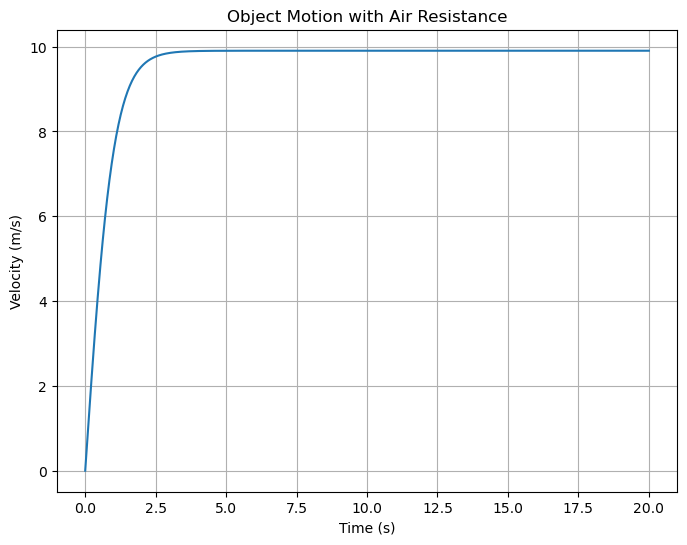

In [30]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def air_resistance_equation(v, t, m, g, k):
    dvdt = g - (k/m) * v**2
    return dvdt

# Initial conditions
v0 = 0  # initial velocity
m = 1.0  # mass of the object
g = 9.81  # acceleration due to gravity
k = 0.1  # air resistance constant

# Time points
t = np.linspace(0, 20, 1000)  # from 0 to 20 seconds

# Solve the ODE
v = odeint(air_resistance_equation, v0, t, args=(m, g, k))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, v)
plt.title('Object Motion with Air Resistance')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()

Rente (RR)

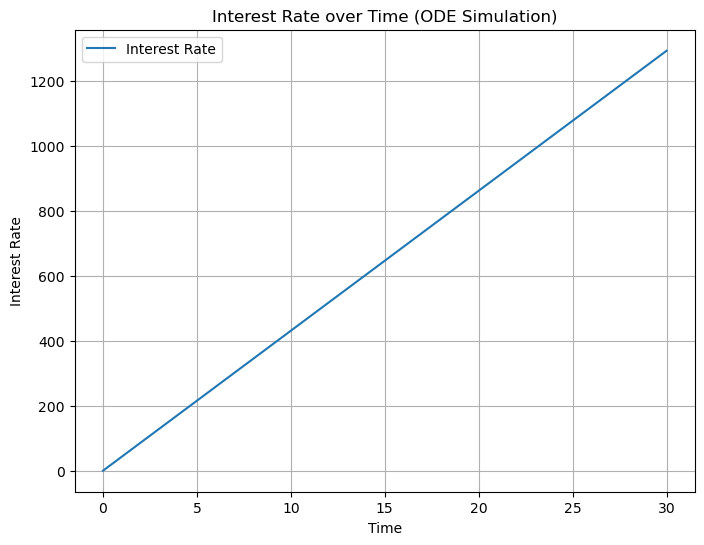

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function defining the ODE
def model(R, t, KPI, monthly_inflation_goal, BNP, potential_BNP):
    dRdt = ((KPI - inflation_target) / inflation_target) + ((BNP - potential_BNP) / potential_BNP)
    return dRdt

# Initial condition (initial interest rate)
initial_interest_rate = 0.05

# Time points
t = np.linspace(0, 30, 100)  # Time from 0 to 10 (arbitrary units)

# Parameters
KPI = 110  # Example KPI value
inflation_target = 0.025  # Example inflation target (constant)
BNP = 10000  # Example BNP value
potential_BNP = 9000  # Example potential BNP (constant)

# Solve the ODE
R = odeint(model, initial_interest_rate, t, args=(KPI, inflation_target, BNP, potential_BNP))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, R, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate over Time (ODE Simulation)')
plt.legend()
plt.grid(True)
plt.show()
